#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2017


# Project: Different Faces of a City


Team members: ...

Project description here...

## Introduction

This project ...

The paper we are referring to...
* http://courses.cse.tamu.edu/caverlee/csce670_2013/livehoods-paper.pdf

We implemented **our algorithm** from scratch.

You can see the code below...



In [8]:
# Data Structure

import string
import glob, os
import re

# Return {venueid : [{userid : time}, {userid : time}, ...], ... }

def get_venue_checkin(filename):
    ret = {}
    
    fp = open(filename, 'r')
    lines = fp.readlines()
    
    for line in lines:
        checkin_time = {}
        arr = re.split("\t", line)
        
        userid = arr[0]
        venueid = arr[1]
        time = re.split(' ', arr[2])
        hour = time[3][0:2]
        
        checkin_time[userid] = hour

        if not ret.has_key(venueid):
            ret[venueid]=[checkin_time]
        else:
            ret[venueid].append(checkin_time)
            
    return ret

austin_venue_checkin = get_venue_checkin("austin_checkin.txt")
houston_venue_checkin = get_venue_checkin("houston_checkin.txt")

In [7]:
# Return {venue : {"latitiude" : latitude, "longitude" : longitude, "type" : type}, ...}

def get_venue_info(filename):
    ret = {}
    
    fp = open(filename, 'r')
    lines = fp.readlines()

    for line in lines:
        arr = re.split("\t", line)
        
        venue_info = {}
        
        venueid = arr[0]
        venue_info["latitude"] = arr[1]
        venue_info["longitude"] = arr[2]
        venue_info["type"] = arr[3]
        
        ret[venueid] = venue_info

    return ret

austin_venue = get_venue_info("austin_venue.txt")
houston_venue = get_venue_info("houston_venue.txt")

In [20]:
# Create hour histogram
# Return [freq@0-period, freq@1-2*period, ...]

def create_histogram(filename, period):
    ret = {}
    
    fp = open(filename, 'r')
    lines = fp.readlines()

    for line in lines:
        arr = re.split('\t', line)
        
        time = re.split(' ', arr[2])
        hour = int(int(time[3][0:2])/period)
        
        if not ret.has_key(hour):
            ret[hour] = 1
        else:
            ret[hour] += 1
            
    sorted_keys = sorted(ret)
    
    ret_list = []
    
    for k in sorted_keys:
        ret_list.append((k, ret[k]))
            
    return ret_list

austin_histogram = create_histogram("austin_checkin.txt", 1)
houston_histogram = create_histogram("houston_checkin.txt", 1)

[(0, 4925), (1, 4220), (2, 3322), (3, 2864), (4, 2754), (5, 2358), (6, 1718), (7, 1098), (8, 669), (9, 523), (10, 793), (11, 1250), (12, 2288), (13, 3146), (14, 2868), (15, 2727), (16, 3470), (17, 4602), (18, 4724), (19, 4106), (20, 3731), (21, 3813), (22, 4394), (23, 5006)]
[(0, 6368), (1, 5024), (2, 4084), (3, 3564), (4, 3489), (5, 2672), (6, 1820), (7, 1222), (8, 834), (9, 679), (10, 1211), (11, 2244), (12, 3780), (13, 4351), (14, 3842), (15, 3799), (16, 4746), (17, 5984), (18, 6225), (19, 5702), (20, 5054), (21, 5066), (22, 5380), (23, 6466)]


In [15]:
from collections import defaultdict

# Return {hour : {venueid : {userid : checkin_freq, ...}, ...}, ...}

def get_checkin_freq_by_hour(filename, period):
    ret = defaultdict(lambda : defaultdict(dict))
    
    fp = open(filename, 'r')
    lines = fp.readlines()

    for line in lines:
        arr = re.split('\t', line)
        
        userid = arr[0]
        venueid = arr[1]
        time = re.split(' ', arr[2])
        hour = int(int(time[3][0:2])/period)
        
        if not ret.has_key(hour):
            ret[hour][venueid][userid] = 1
        else:
            if not ret[hour].has_key(venueid):
                ret[hour][venueid][userid] = 1
            else:
                if not ret[hour][venueid].has_key(userid):
                    ret[hour][venueid][userid] = 1
                else:
                    ret[hour][venueid][userid] += 1
                    
    return ret
    
austin_checkin_freq = get_checkin_freq_by_hour("austin_checkin.txt", 1)
houston_checkin_freq = get_checkin_freq_by_hour("houston_checkin.txt", 1)

In [23]:
# Return {hour : {venue_type : freq, ...}, ...}

def create_pie_chart(freq, info, period):
    ret = {}
    
    for hour, venues in freq.iteritems():
        for venueid, users in venues.iteritems():
            venue_type = info[venueid]["type"]
            
            checkin_total = 0
            for userid, checkin_count in users.iteritems():
                checkin_total += checkin_count
                
            if not ret.has_key(hour):
                ret[hour] = {}
                ret[hour][venue_type] = checkin_total
                
            else:
                if not ret[hour].has_key(venue_type):
                    ret[hour][venue_type] = checkin_total
                else:
                    ret[hour][venue_type] += checkin_total
                    
    return ret

austin_pie_chart = create_pie_chart(austin_checkin_freq, austin_venue, 1)
houston_pie_chart = create_pie_chart(houston_checkin_freq, houston_venue, 1)

{0: {'College Arts Building': 2, 'Trade School': 3, 'Boutique': 5, 'College Theater': 3, 'Wine Bar': 30, 'Middle Eastern Restaurant': 4, 'Arts & Entertainment': 2, 'Scenic Lookout': 10, 'Student Center': 10, 'Italian Restaurant': 50, 'Yoga Studio': 11, 'Baseball Field': 12, 'Tailor Shop': 1, 'French Restaurant': 14, 'Home (private)': 234, 'Korean Restaurant': 7, 'Gym': 67, 'Indian Restaurant': 27, 'Playground': 3, 'Karaoke Bar': 7, 'Light Rail': 6, 'Fraternity House': 4, 'Post Office': 3, 'Bookstore': 16, 'Arts & Crafts Store': 7, 'Road': 14, 'Video Game Store': 1, 'Hiking Trail': 7, 'Japanese Restaurant': 15, 'College Residence Hall': 2, 'Pool': 18, 'Sushi Restaurant': 51, 'Building': 35, 'Cocktail Bar': 36, 'Bar': 280, 'Dive Bar': 70, 'Martial Arts Dojo': 15, 'Southern / Soul Food Restaurant': 4, 'Travel & Transport': 1, 'Pizza Place': 83, 'Music Store': 4, 'Hot Dog Joint': 9, 'Ice Cream Shop': 38, 'Cuban Restaurant': 1, 'Bakery': 4, 'Gift Shop': 4, 'Government Building': 2, 'Tech St

Another function is here

In [3]:
def cubed(x):
    """ Return the cube of a  
        value """
    return x ** 3

cubed(3)

27

### Here, we gonna plot our clusters

Description's here...

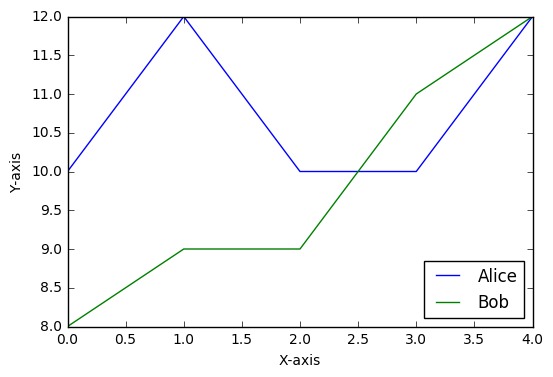

In [72]:
# this line prepares IPython for working with matplotlib
%matplotlib inline  

import matplotlib.pyplot as plt  

x = [0, 1, 2, 3, 4]  
y1 = [10, 12, 10, 10, 12]
y2 = [8, 9, 9, 11, 12]
line_up, = plt.plot(x, y1, label = "Alice")
line_down, = plt.plot(x, y2, label = "Bob") 
# your code here (plus you may need to modify the previous two lines)
plt.legend(handles=[line_up, line_down], loc = 4)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

Another **markdown cell** here!